In [1]:
print ("hello")

hello


In [55]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
scrapped = pd.read_csv('dataset/AirlineScrappedReview_Cleaned.csv')
display(scrapped.info())
display(scrapped.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   3575 non-null   object 
 8   Class            3575 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

None

,Rating,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816
std,3.170323,17.022014,44.576587,18.723619,46.045735
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765
75%,8.000000,51.467739,11.048029,51.467739,11.048029
max,10.000000,65.011873,151.208285,64.145981,174.550610


Passanger_Name        1
Flying_Date        2620
Route               766
Rating                0
Verified              0
Review_title          0
Review_content        0
Traveller_Type        0
Class                 0
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64

<Axes: >

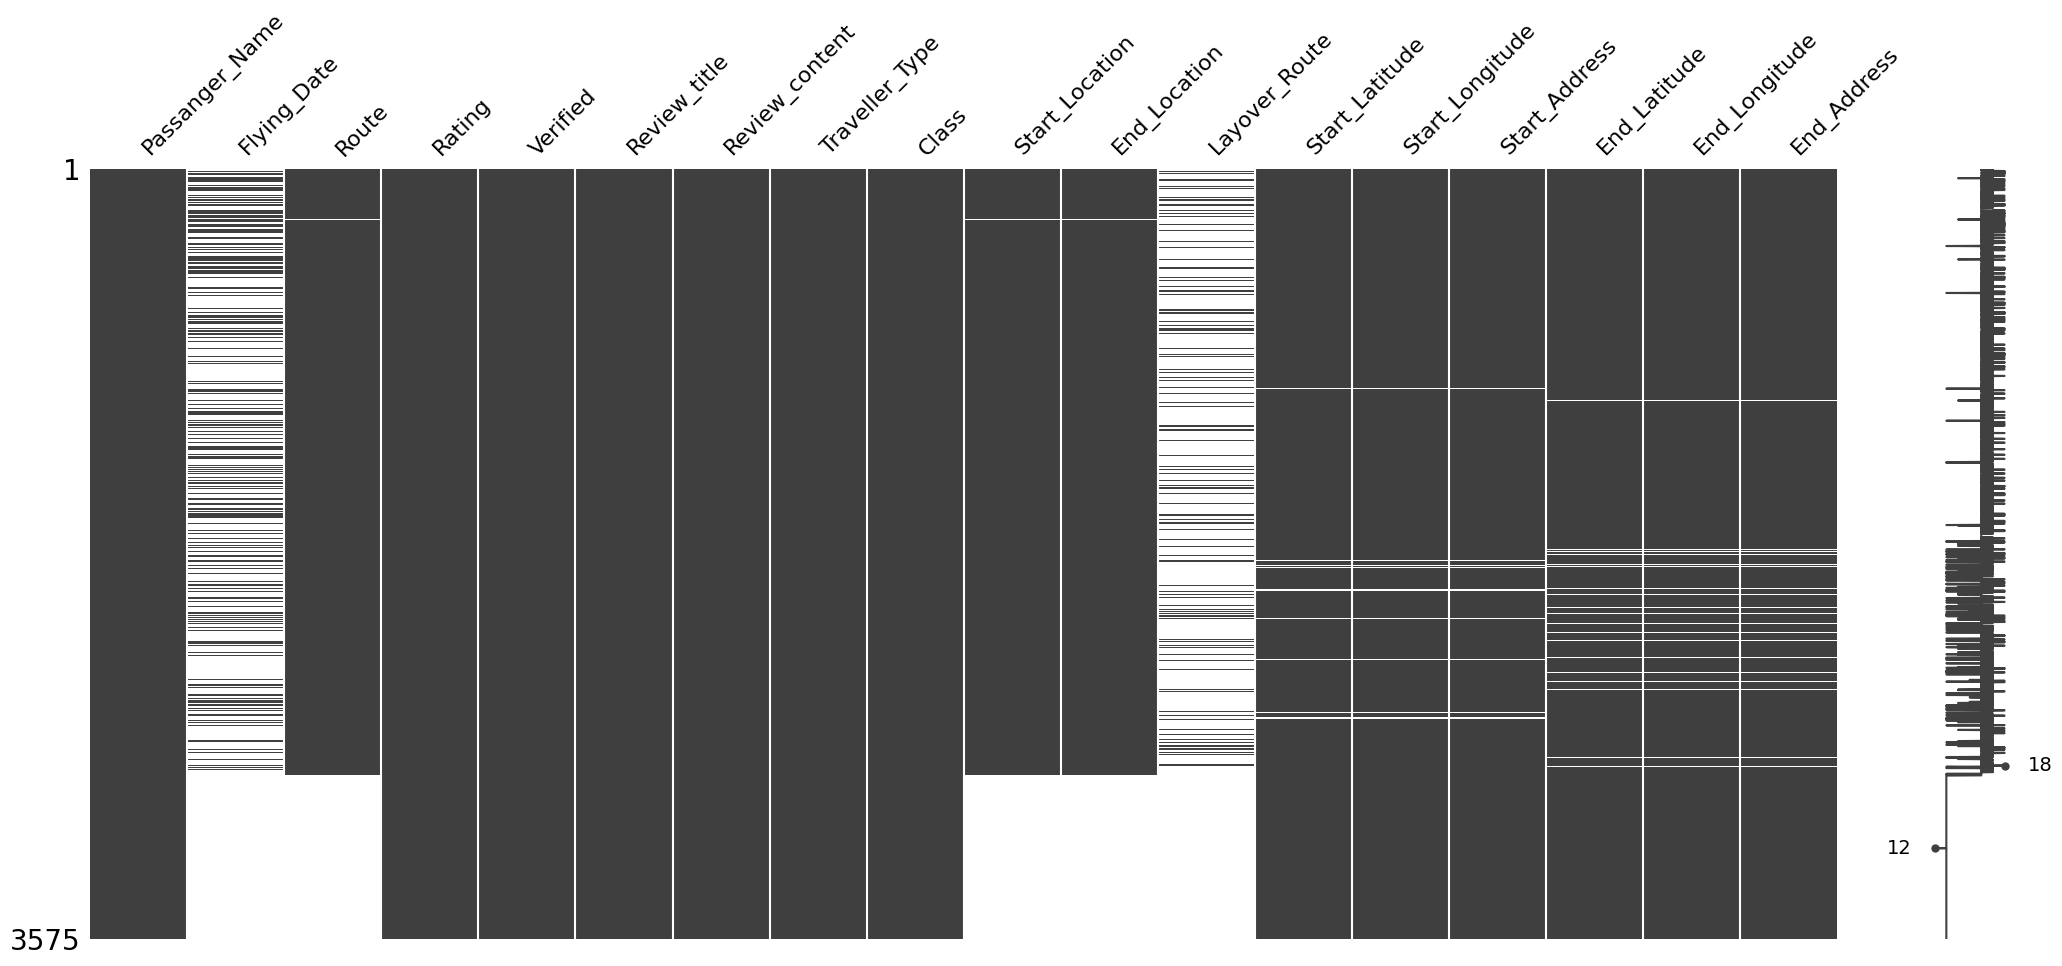

In [4]:
display(scrapped.isnull().sum())
display(msno.matrix(scrapped))

In [18]:

df = scrapped.copy()                 # define df from the loaded DataFrame
# or: df = pd.read_csv('dataset/AirlineScrappedReview_Cleaned.csv')
df = df.drop(columns=['Flying_Date'], errors='ignore')  # use the actual column name; ignore if not present
# ...existing code...

Passanger_Name        1
Flying_Date        2620
Route               766
Rating                0
Verified              0
Review_title          0
Review_content        0
Traveller_Type        0
Class                 0
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64

<Axes: >

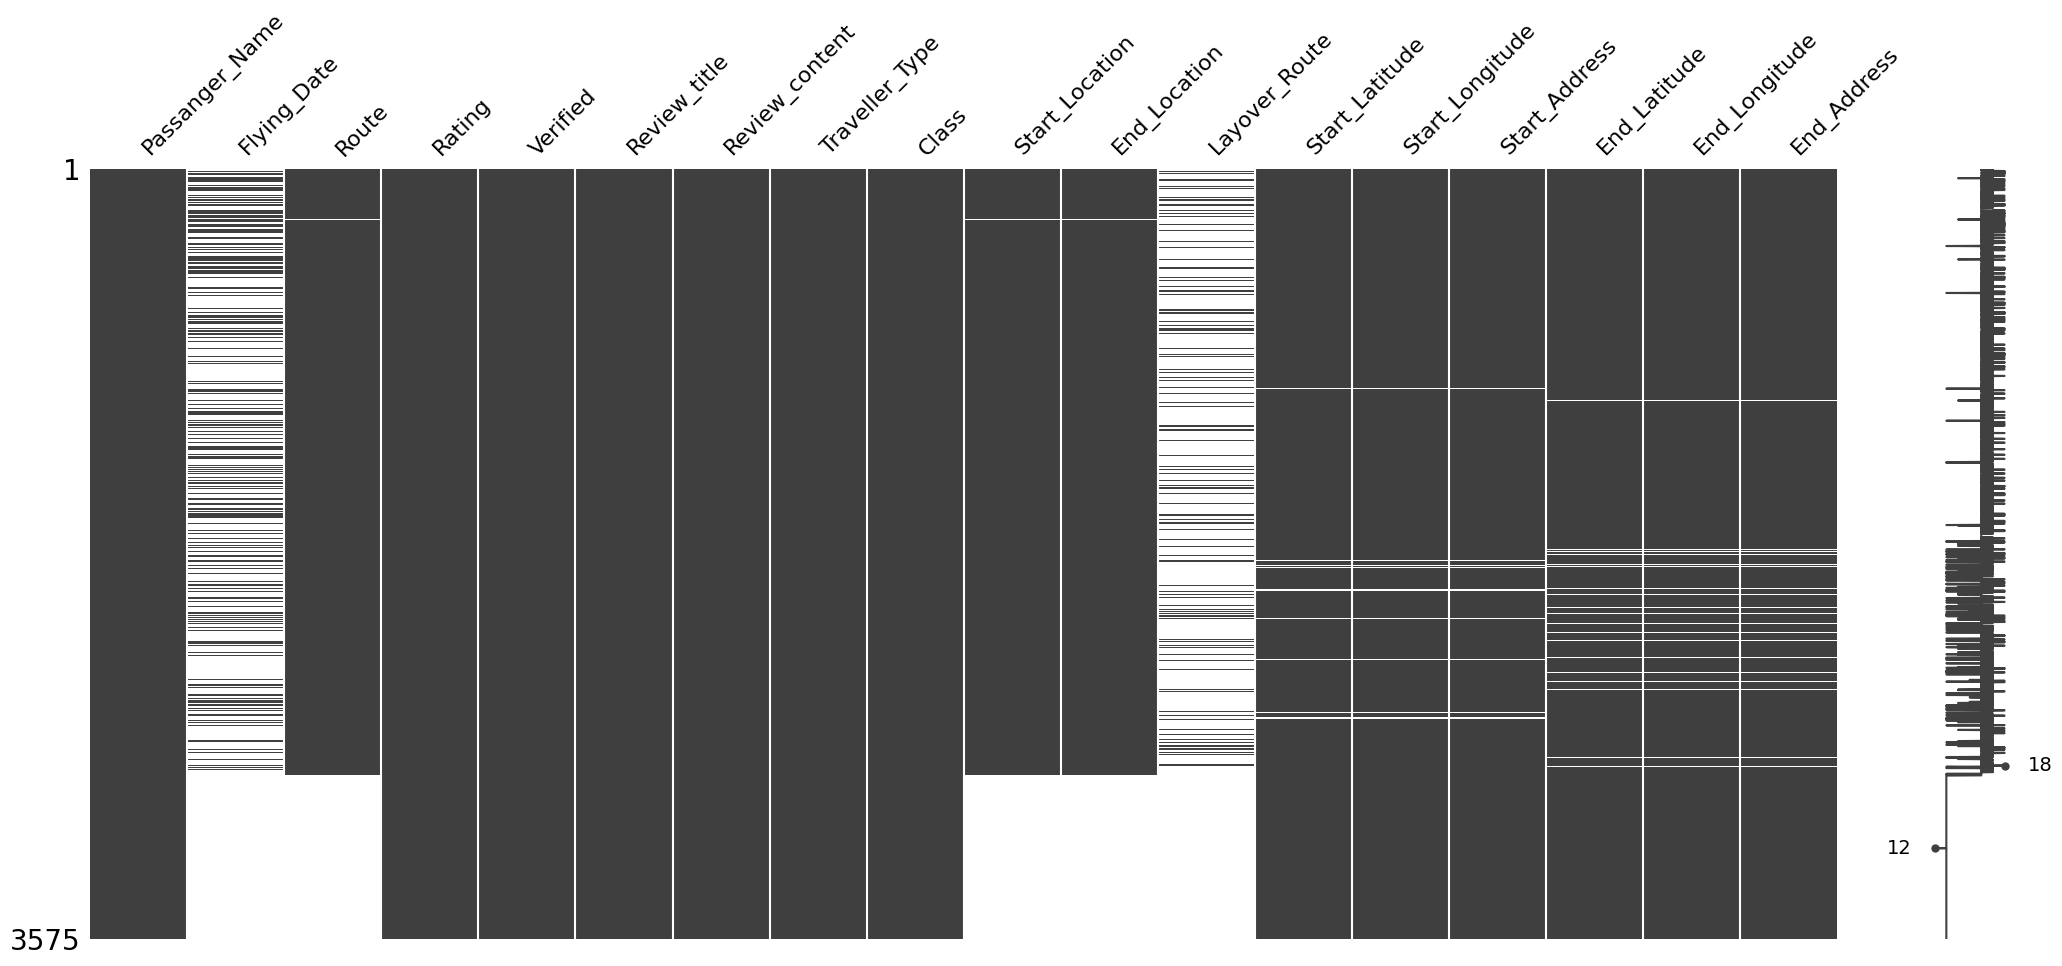

In [19]:
display(scrapped.isnull().sum())
display(msno.matrix(scrapped))


In [20]:
# ...existing code...
print(scrapped.columns.tolist())               # quick view
print([repr(c) for c in scrapped.columns])     # reveals hidden spaces/case issues
# ...existing code...

['Passanger_Name', 'Flying_Date', 'Route', 'Rating', 'Verified', 'Review_title', 'Review_content', 'Traveller_Type', 'Class', 'Start_Location', 'End_Location', 'Layover_Route', 'Start_Latitude', 'Start_Longitude', 'Start_Address', 'End_Latitude', 'End_Longitude', 'End_Address']
["'Passanger_Name'", "'Flying_Date'", "'Route'", "'Rating'", "'Verified'", "'Review_title'", "'Review_content'", "'Traveller_Type'", "'Class'", "'Start_Location'", "'End_Location'", "'Layover_Route'", "'Start_Latitude'", "'Start_Longitude'", "'Start_Address'", "'End_Latitude'", "'End_Longitude'", "'End_Address'"]


Passanger_Name        1
Route               766
Rating                0
Verified              0
Review_title          0
Review_content        0
Traveller_Type        0
Class                 0
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64

<Axes: >

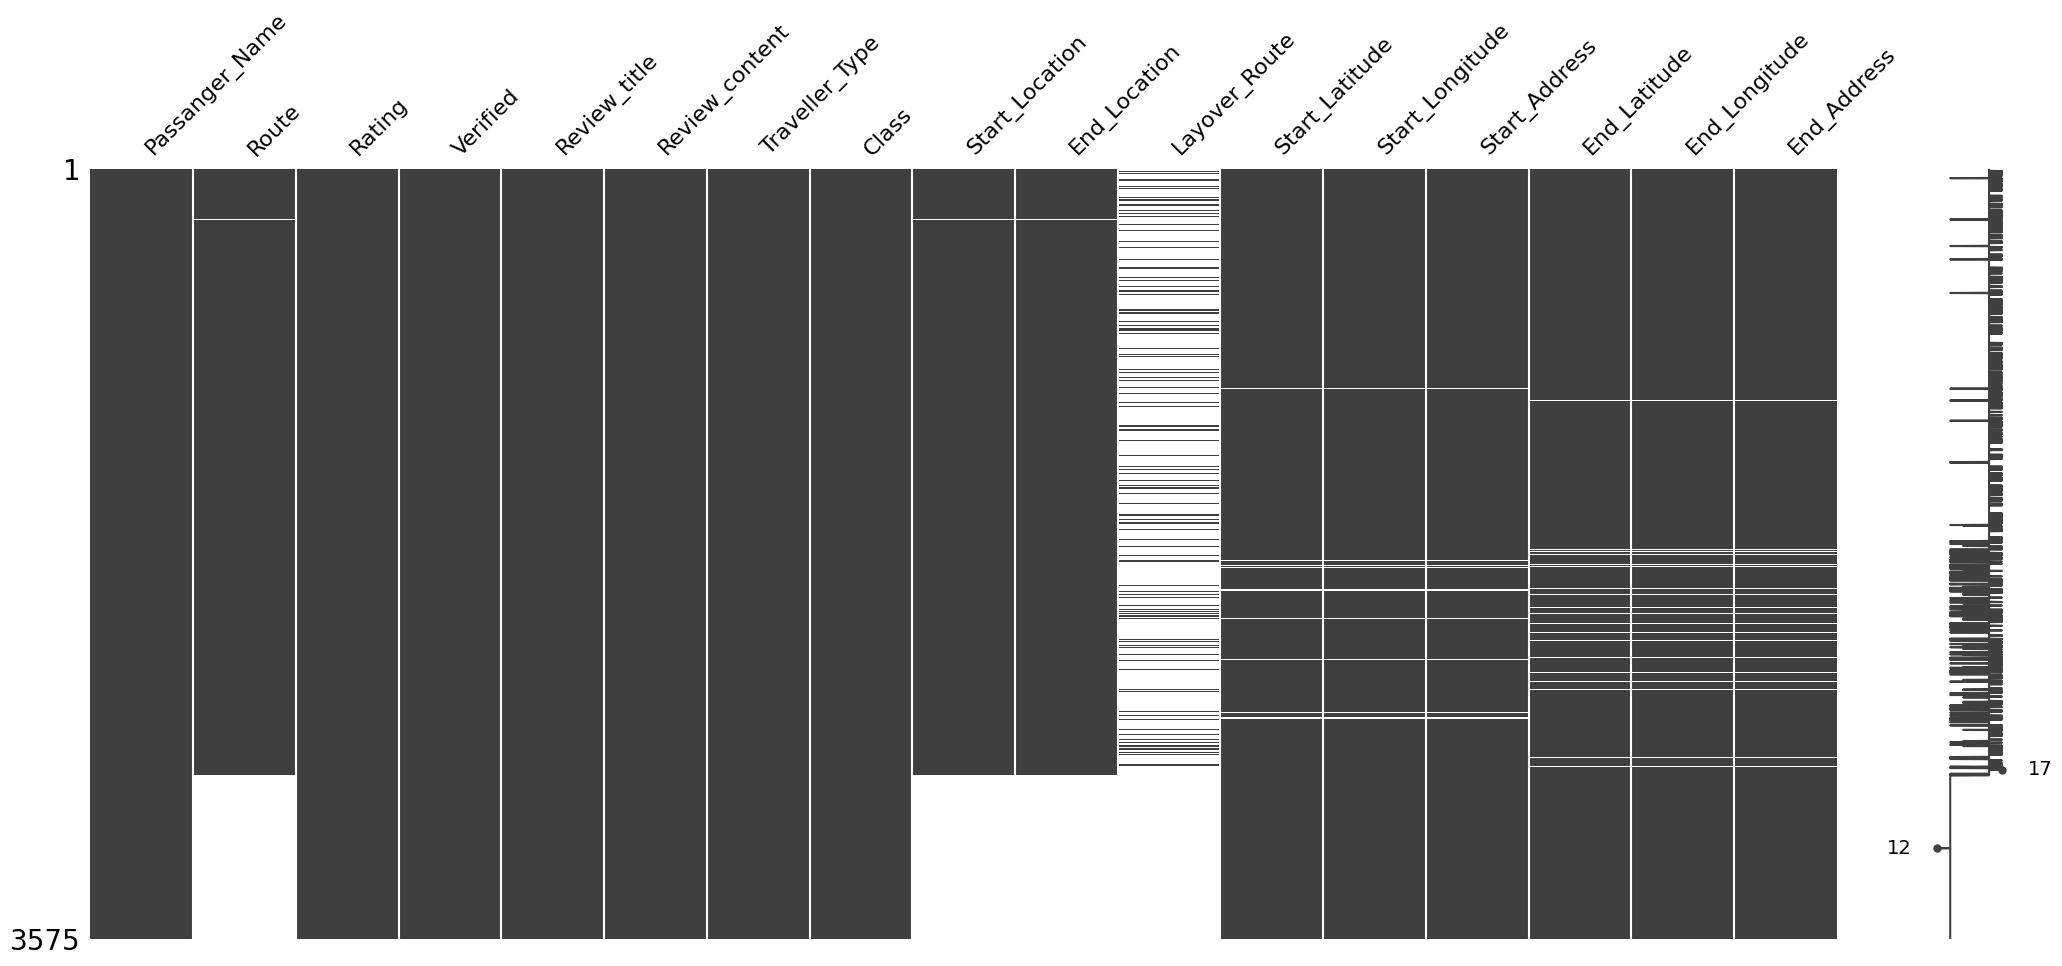

In [21]:
# ...existing code...
# Option A: drop from scrapped
scrapped = scrapped.drop(columns=['Flying_Date'], errors='ignore')
display(scrapped.isnull().sum())
display(msno.matrix(scrapped))
# ...existing code...

Passanger_Name       1
Route              766
Rating               0
Verified             0
Review_title         0
Review_content       0
Traveller_Type       0
Class                0
Start_Location     766
End_Location       766
Start_Latitude      60
Start_Longitude     60
Start_Address       60
End_Latitude        99
End_Longitude       99
End_Address         99
dtype: int64

<Axes: >

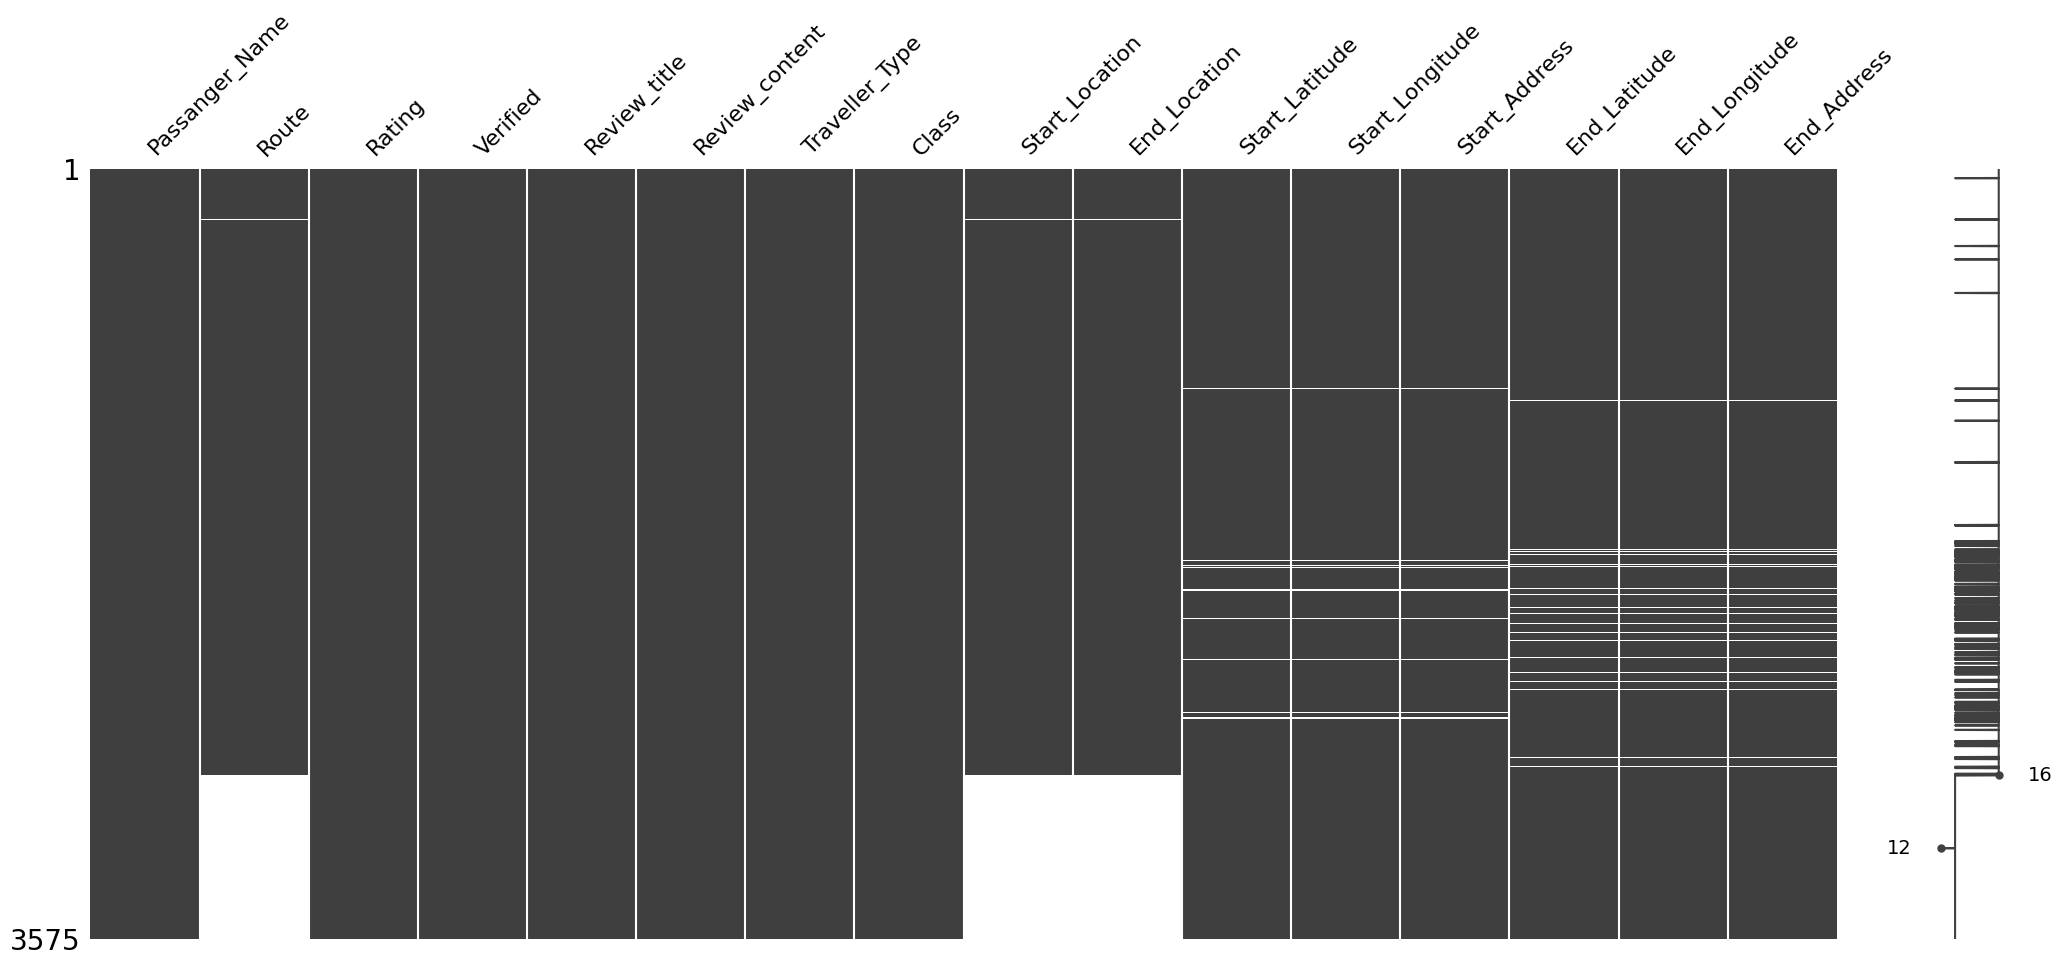

In [28]:
scrapped = scrapped.drop(columns=['Layover_Route'], errors='ignore')
display(scrapped.isnull().sum())
display(msno.matrix(scrapped))

In [30]:
scrapped['Satisfaction'] = scrapped['Rating'].apply(lambda x: 'Satisfied' if x >= 5 else 'Dissatisfied')

In [31]:
satisfaction_counts = scrapped['Satisfaction'].value_counts()

In [32]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Passenger Satisfaction')

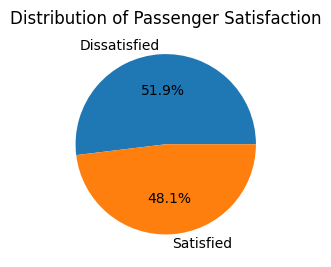

In [33]:
plt.subplot(1, 2, 1)
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Passenger Satisfaction')


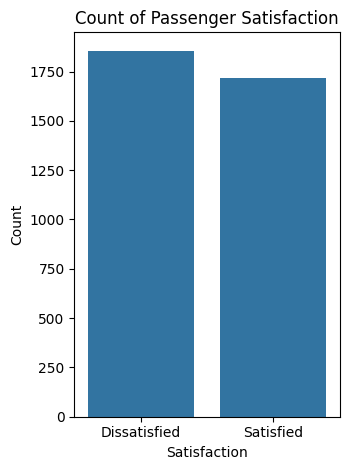

In [37]:
plt.subplot(1, 2, 2)
sns.countplot(data=scrapped, x='Satisfaction')
plt.title('Count of Passenger Satisfaction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
print("\nSatisfaction Counts:")
print(satisfaction_counts)
print("\nSatisfaction Percentages:")
print(round(satisfaction_counts / len(scrapped) * 100, 2))# Get satisfaction counts by route
route_satisfaction = pd.crosstab(scrapped['Route'], scrapped['Satisfaction'])

# Calculate percentages
route_satisfaction_pct = route_satisfaction.div(route_satisfaction.sum(axis=1), axis=0) * 100

# Create a figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create stacked bar chart
route_satisfaction_pct.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Route')
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nSatisfaction Counts by Route:")
print(route_satisfaction)
print("\nSatisfaction Percentages by Route:")
print(round(route_satisfaction_pct, 2))

# Display top 5 routes with highest satisfaction percentage
satisfied_pct = route_satisfaction_pct['Satisfied'].sort_values(ascending=False)
print("\nTop 5 Routes by Satisfaction Percentage:")
print(satisfied_pct.head())


Satisfaction Counts:
Satisfaction
Dissatisfied    1856
Satisfied       1719
Name: count, dtype: int64

Satisfaction Percentages:
Satisfaction
Dissatisfied    51.92
Satisfied       48.08
Name: count, dtype: float64


In [38]:
route_satisfaction = pd.crosstab(scrapped['Route'], scrapped['Satisfaction'])


In [39]:
route_satisfaction_pct = route_satisfaction.div(route_satisfaction.sum(axis=1), axis=0) * 100

In [40]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

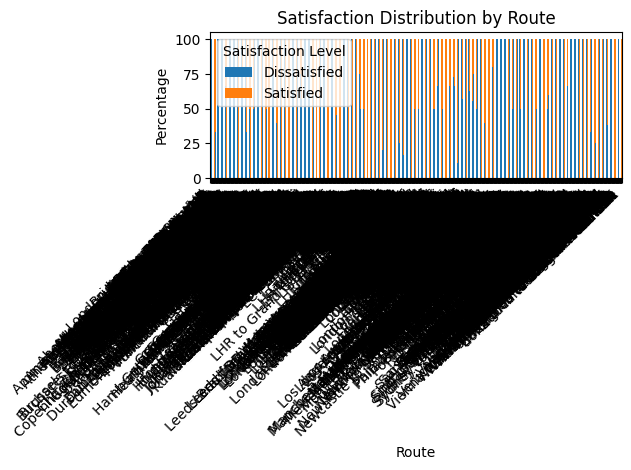

In [41]:
route_satisfaction_pct.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Route')
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
print("\nSatisfaction Counts by Route:")
print(route_satisfaction)
print("\nSatisfaction Percentages by Route:")
print(round(route_satisfaction_pct, 2))


Satisfaction Counts by Route:
Satisfaction                  Dissatisfied  Satisfied
Route                                                
 Bridgetown to Gatwick                   1          0
 London Heathrow to Madrid               0          1
ABV to LHR                               1          0
ABZ to SFO via LHR                       1          0
ACC to LHR                               1          0
...                                    ...        ...
Zurich to London Heathrow                2          0
Zürich to London                         0          1
doha to londonDoha to London             0          1
iAH to LHR                               0          1
lgw to alicante                          0          1

[1541 rows x 2 columns]

Satisfaction Percentages by Route:
Satisfaction                  Dissatisfied  Satisfied
Route                                                
 Bridgetown to Gatwick               100.0        0.0
 London Heathrow to Madrid             0.0  

In [43]:
satisfied_pct = route_satisfaction_pct['Satisfied'].sort_values(ascending=False)
print("\nTop 5 Routes by Satisfaction Percentage:")
print(satisfied_pct.head())


Top 5 Routes by Satisfaction Percentage:
Route
lgw to alicante               100.0
iAH to LHR                    100.0
 London Heathrow to Madrid    100.0
YVR-LIS via LHR               100.0
YVR to CDG via LHR            100.0
Name: Satisfied, dtype: float64


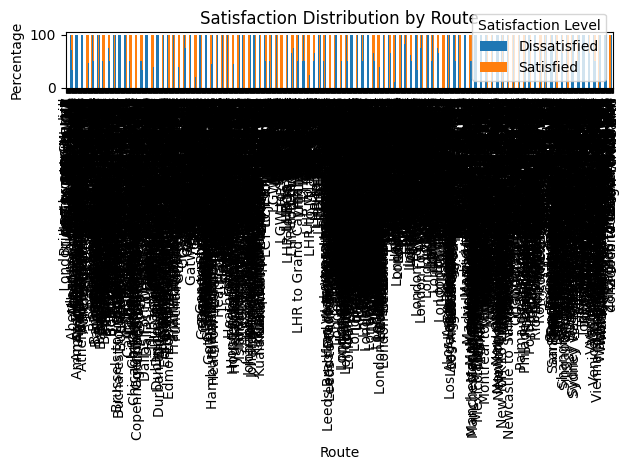

In [46]:
route_satisfaction_pct.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Route')
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=90)  # Changed from 45 to 0
plt.tight_layout()
plt.show()

In [45]:
plt.figure(figsize=(20, 8))  # Make the figure wider to accommodate horizontal labels

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

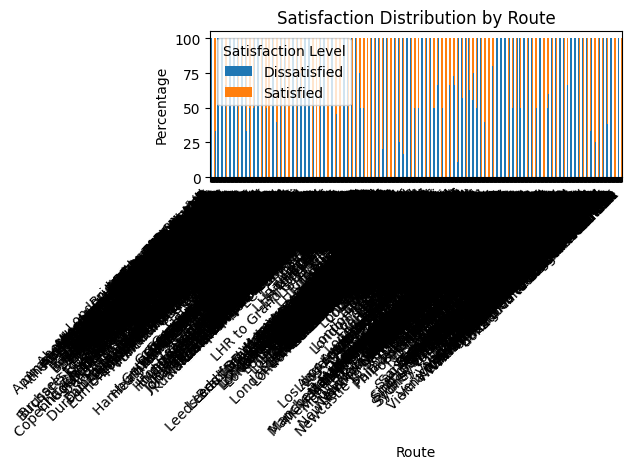

In [47]:
plt.figure(figsize=(20, 8))  # Increased width to accommodate all labels
route_satisfaction_pct.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Route')
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45, ha='right')  # 45 degree angle is often most readable
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to prevent label cutoff
plt.tight_layout()
plt.show()

<Figure size 2500x1000 with 0 Axes>

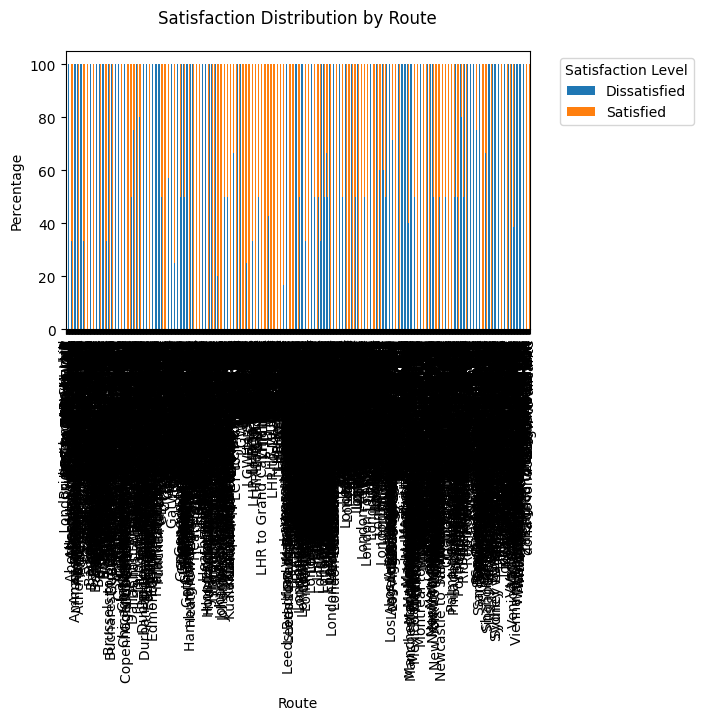

In [48]:
plt.figure(figsize=(25, 10))  # Even wider figure
route_satisfaction_pct.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Route', pad=20)
plt.xlabel('Route', labelpad=10)
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)  # Vertical labels for better readability
plt.subplots_adjust(bottom=0.3, right=0.85)  # More space for labels and legend
plt.show()

In [49]:
longitude_satisfaction = pd.crosstab(scrapped['Start_Longitude'], scrapped['Satisfaction'])
longitude_satisfaction_pct = longitude_satisfaction.div(longitude_satisfaction.sum(axis=1), axis=0) * 100

In [50]:
longitude_satisfaction_pct = longitude_satisfaction_pct.sort_index()

In [51]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

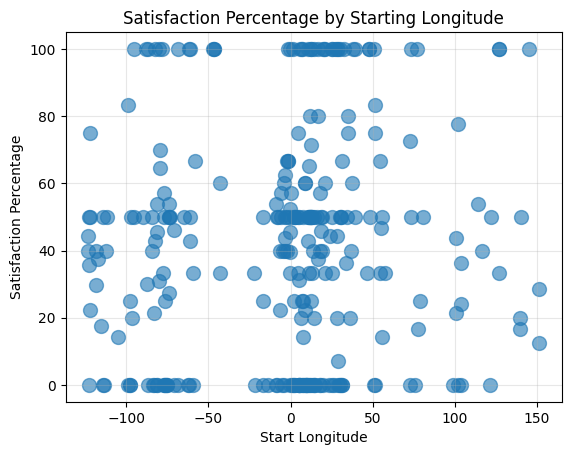

In [52]:
plt.scatter(longitude_satisfaction_pct.index, 
           longitude_satisfaction_pct['Satisfied'],
           alpha=0.6,
           s=100)  # size of points

plt.title('Satisfaction Percentage by Starting Longitude')
plt.xlabel('Start Longitude')
plt.ylabel('Satisfaction Percentage')
plt.grid(True, alpha=0.3)

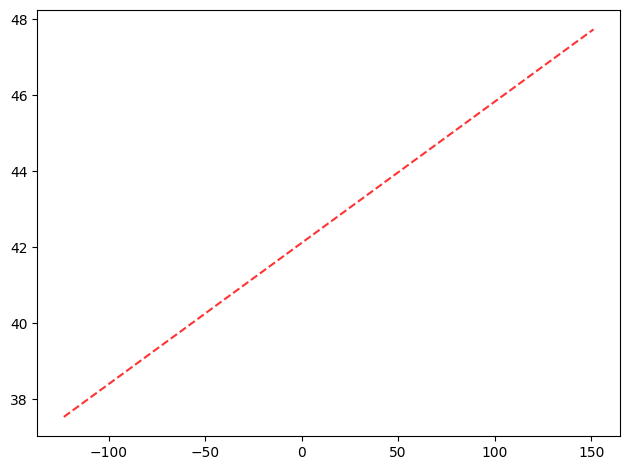

In [56]:
z = np.polyfit(longitude_satisfaction_pct.index, longitude_satisfaction_pct['Satisfied'], 1)
p = np.poly1d(z)
plt.plot(longitude_satisfaction_pct.index, p(longitude_satisfaction_pct.index), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

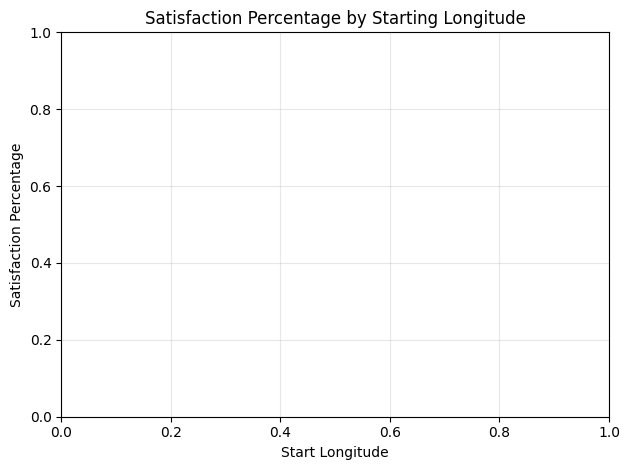

In [57]:
plt.title('Satisfaction Percentage by Starting Longitude')
plt.xlabel('Start Longitude')
plt.ylabel('Satisfaction Percentage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
route_frequency = scrapped['Route'].value_counts().head(10)

([<matplotlib.axis.YTick at 0x22fe0182fd0>,
 [Text(0, 0, 'London to Johannesburg'),
  Text(0, 1, 'London to Cape Town'),
  Text(0, 2, 'LHR to MIA'),
  Text(0, 3, 'Vancouver to London'),
  Text(0, 4, 'Johannesburg to London'),
  Text(0, 5, 'Cape Town to London'),
  Text(0, 6, 'BKK to LHR'),
  Text(0, 7, 'Hong Kong to London'),
  Text(0, 8, 'London to Athens'),
  Text(0, 9, 'London to Hong Kong')])

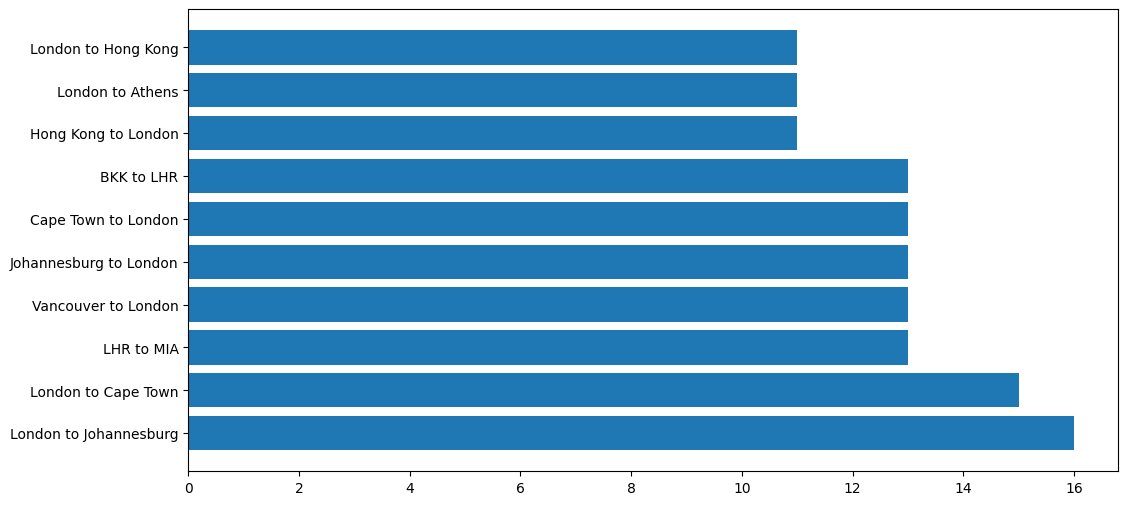

In [59]:
plt.figure(figsize=(12, 6))
bars = plt.barh(y=range(len(route_frequency)), width=route_frequency.values)
plt.yticks(range(len(route_frequency)), route_frequency.index)

In [63]:
print("\nTop 10 Routes by Frequency:")
print(route_frequency)


Top 10 Routes by Frequency:
Route
London to Johannesburg    16
London to Cape Town       15
LHR to MIA                13
Vancouver to London       13
Johannesburg to London    13
Cape Town to London       13
BKK to LHR                13
Hong Kong to London       11
London to Athens          11
London to Hong Kong       11
Name: count, dtype: int64


In [64]:
scrapped = pd.read_csv('dataset/Passanger_booking_data.csv')
display(scrapped.info())
display(scrapped.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

None

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<Axes: >

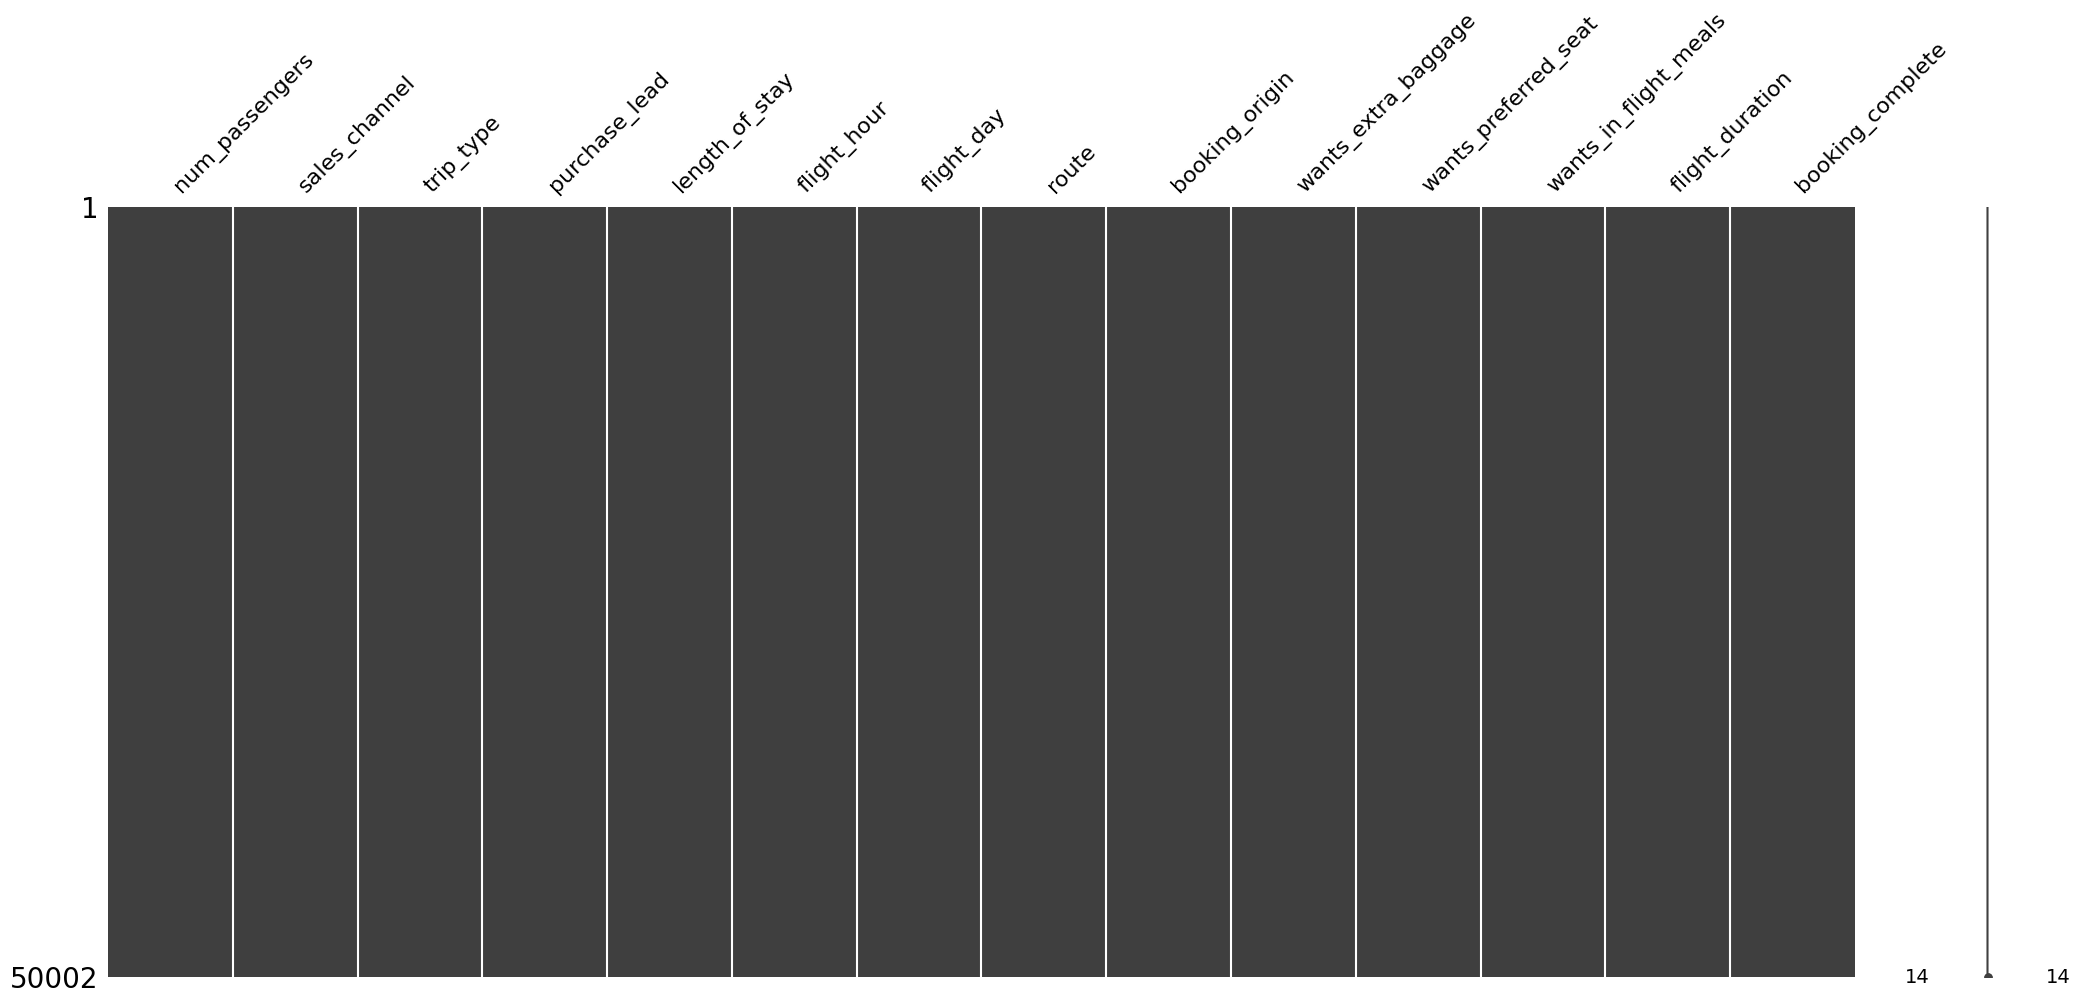

In [65]:
display(scrapped.isnull().sum())
display(msno.matrix(scrapped))


In [67]:
df['Route'] = df['Route'].astype(str).str.strip()
df_booking = df[df['Route'].notna() & (df['Route'] != '')]

In [68]:
top10 = df_booking['Route'].value_counts().nlargest(10)

C:\Users\asus\AppData\Local\Temp\ipykernel_29208\842600691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


<Axes: ylabel='Route'>

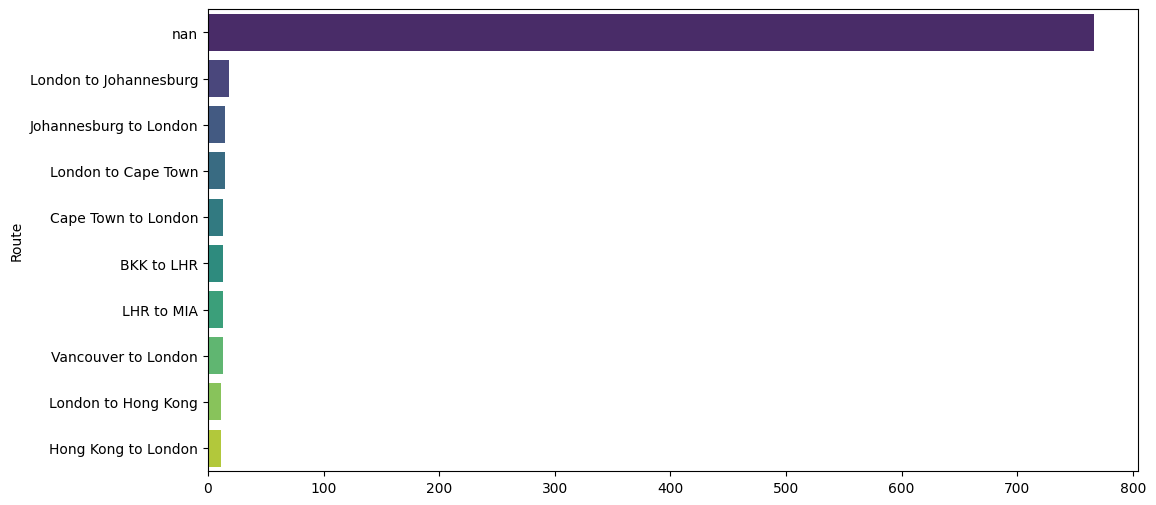

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')

In [71]:
print("\nTop 10 Routes by Frequency:")
print(top10)


Top 10 Routes by Frequency:
Route
nan                       766
London to Johannesburg     18
Johannesburg to London     15
London to Cape Town        15
Cape Town to London        13
BKK to LHR                 13
LHR to MIA                 13
Vancouver to London        13
London to Hong Kong        11
Hong Kong to London        11
Name: count, dtype: int64


In [72]:
import math

In [77]:
col = next((c for c in df_booking.columns if 'flight' in c.lower() and 'hour' in c.lower()), df_booking.columns[0])
s = df_booking[col].astype(str).str.strip()

In [78]:
hours = pd.to_timedelta(s, errors='coerce').dt.total_seconds() / 3600
hours = hours.fillna(pd.to_numeric(s, errors='coerce')).dropna()

In [79]:
max_hour = math.ceil(hours.max())
bins = np.arange(0, max_hour + 1)
labels = [f"{i}-{i+1}h" for i in range(len(bins)-1)]
hours_binned = pd.cut(hours, bins=bins, labels=labels, right=False, include_lowest=True)
freq = hours_binned.value_counts().sort_index()

In [81]:
col = next((c for c in df_booking.columns if ('hour' in c.lower() or 'flight' in c.lower() or 'duration' in c.lower())), df_booking.columns[0])
print("\nUsing column:", repr(col))
print("\nSample values (first 50):")
display(df_booking[col].astype(str).head(50))
print("\nUnique sample values (up to 50):")
print(df_booking[col].astype(str).dropna().unique()[:50])


Using column: 'flight_hour'

Sample values (first 50):


0      6
1      7
2      3
3     17
4      4
5     15
6     20
7      6
8     14
9      4
10    12
11    14
12     2
13    19
14    14
15     4
16    14
17     6
18    10
19     8
20     3
21    23
22     9
23     8
24    13
25     6
26     7
27     6
28     7
29    11
30     2
31    23
32     4
33     0
34     4
35     7
36     4
37    14
38     3
39     7
40     1
41     7
42     7
43     8
44     7
45    14
46     2
47    14
48     7
49    14
Name: flight_hour, dtype: object


Unique sample values (up to 50):
['6' '7' '3' '17' '4' '15' '20' '14' '12' '2' '19' '10' '8' '23' '9' '13'
 '11' '0' '1' '5' '16' '18' '22' '21']


In [82]:
col = next((c for c in df_booking.columns if ('hour' in c.lower() or 'flight' in c.lower() or 'duration' in c.lower())), df_booking.columns[0])
s = df_booking[col].astype(str).str.strip()

In [83]:
hours_from_td = pd.to_timedelta(s, errors='coerce').dt.total_seconds() / 3600

In [84]:
hm = s.str.extract(r'(?i)(?:(\d+)[\s]*h(?:ou)?(?:rs?)?)?[\s,]*(?:(\d+)[\s]*m(?:in(?:ute)?s?)?)?')
hours_hm = pd.to_numeric(hm[0], errors='coerce').fillna(0) + pd.to_numeric(hm[1], errors='coerce').fillna(0) / 60


In [85]:
hours_numeric = pd.to_numeric(s.str.replace(',', '.'), errors='coerce')


In [86]:
hours = hours_from_td.fillna(hours_hm).fillna(hours_numeric).dropna()


In [87]:
minutes_mask = (hours.empty == False) 

C:\Users\asus\AppData\Local\Temp\ipykernel_29208\2002308180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_freq.index, y=flight_freq.values, palette='viridis')


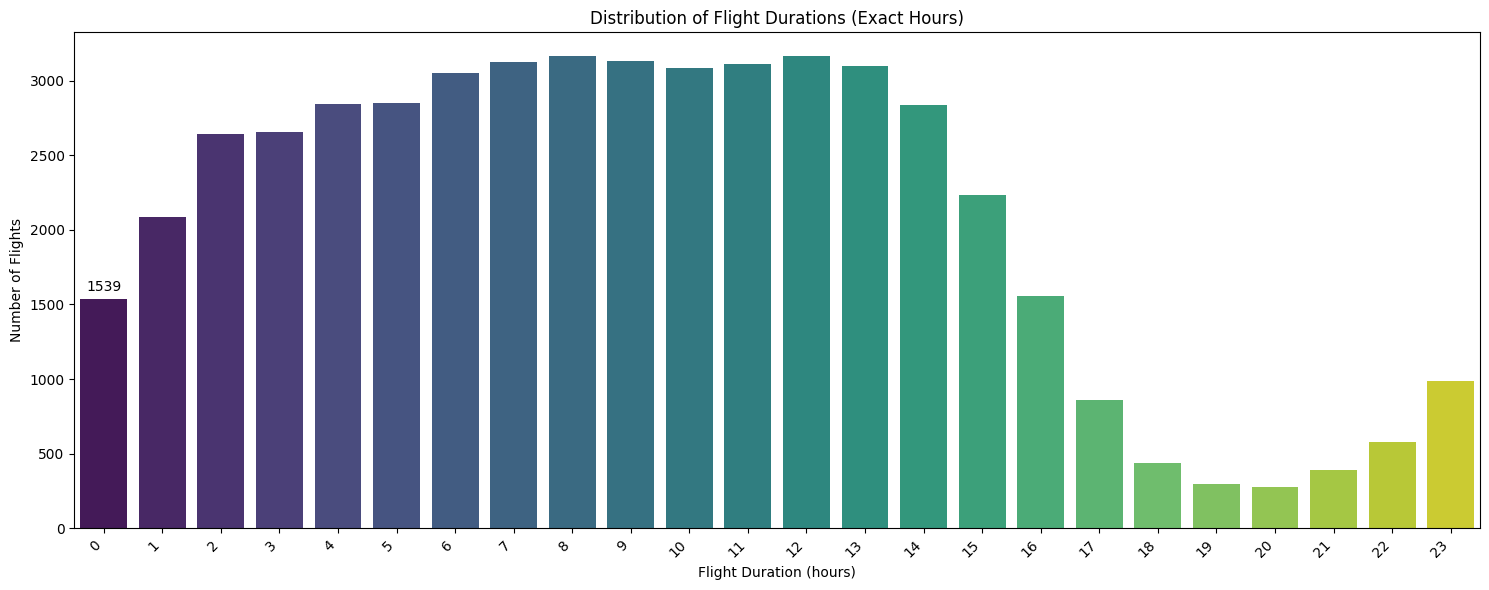


Flight duration frequencies (exact hours):
flight_hour
0     1539
1     2089
2     2642
3     2655
4     2843
5     2851
6     3051
7     3126
8     3165
9     3133
10    3085
11    3110
12    3163
13    3101
14    2833
15    2234
16    1557
17     861
18     439
19     295
20     276
21     389
22     579
23     986
Name: count, dtype: int64


In [93]:
# Get frequency counts for each exact flight hour
df_booking = pd.read_csv('dataset/Passanger_booking_data.csv')
flight_freq = df_booking['flight_hour'].value_counts().sort_index()

# Create bar plot with exact hours
plt.figure(figsize=(15, 6))
sns.barplot(x=flight_freq.index, y=flight_freq.values, palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Durations (Exact Hours)')

# Add value labels automatically using sns.barplot
ax = plt.gca()
ax.bar_label(ax.containers[0], padding=3)

plt.tight_layout()
plt.show()

# Print exact frequencies
print("\nFlight duration frequencies (exact hours):")
print(flight_freq)

C:\Users\asus\AppData\Local\Temp\ipykernel_29208\1254500748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=combo_ratings, x='mean', y='combo', palette='viridis')


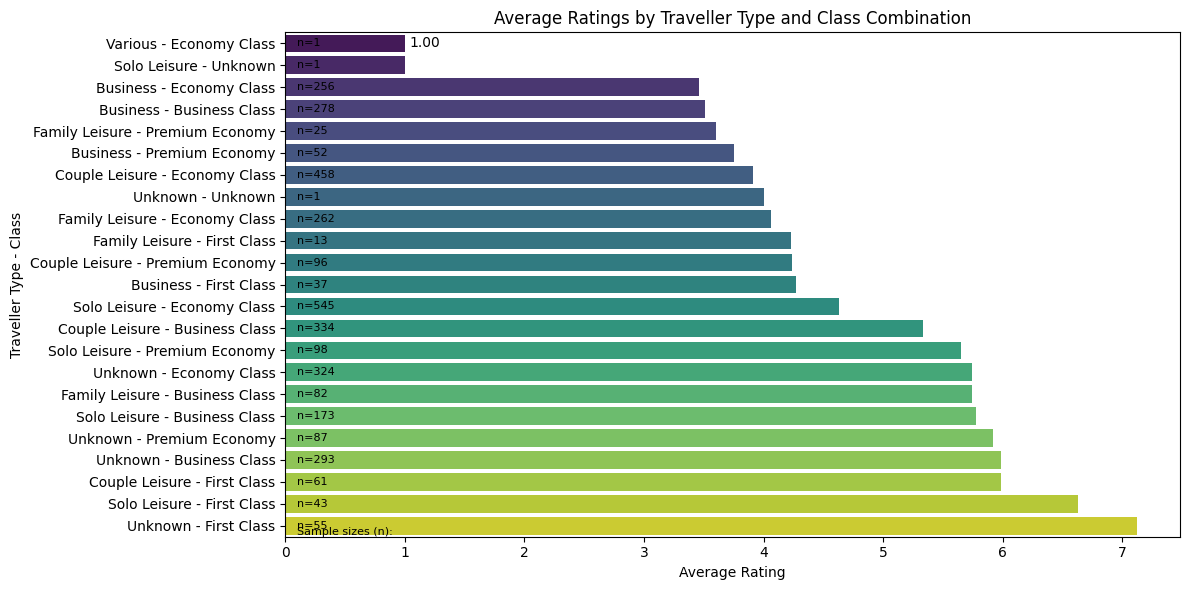


Highest rated combination:
combo    Unknown - First Class
mean                  7.127273
count                       55

Lowest rated combination:
combo    Various - Economy Class
mean                         1.0
count                          1


In [94]:
# Read and prepare data
scrapped = pd.read_csv('dataset/AirlineScrappedReview_Cleaned.csv')
combo_ratings = scrapped.groupby(['Traveller_Type', 'Class'])['Rating'].agg(['mean', 'count']).reset_index()
combo_ratings['combo'] = combo_ratings['Traveller_Type'] + ' - ' + combo_ratings['Class']
combo_ratings = combo_ratings.sort_values('mean')

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=combo_ratings, x='mean', y='combo', palette='viridis')

# Add labels and annotations
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)
plt.text(0.1, plt.ylim()[0], f'Sample sizes (n):', va='bottom', fontsize=8)
[plt.text(0.1, i, f'n={int(n)}', va='center', fontsize=8) 
 for i, n in zip(range(len(combo_ratings)), combo_ratings['count'])]

# Customize plot
plt.title('Average Ratings by Traveller Type and Class Combination')
plt.xlabel('Average Rating')
plt.ylabel('Traveller Type - Class')
plt.tight_layout()
plt.show()

# Print statistics
print("\nHighest rated combination:")
print(combo_ratings.iloc[-1][['combo', 'mean', 'count']].to_string())
print("\nLowest rated combination:")
print(combo_ratings.iloc[0][['combo', 'mean', 'count']].to_string())

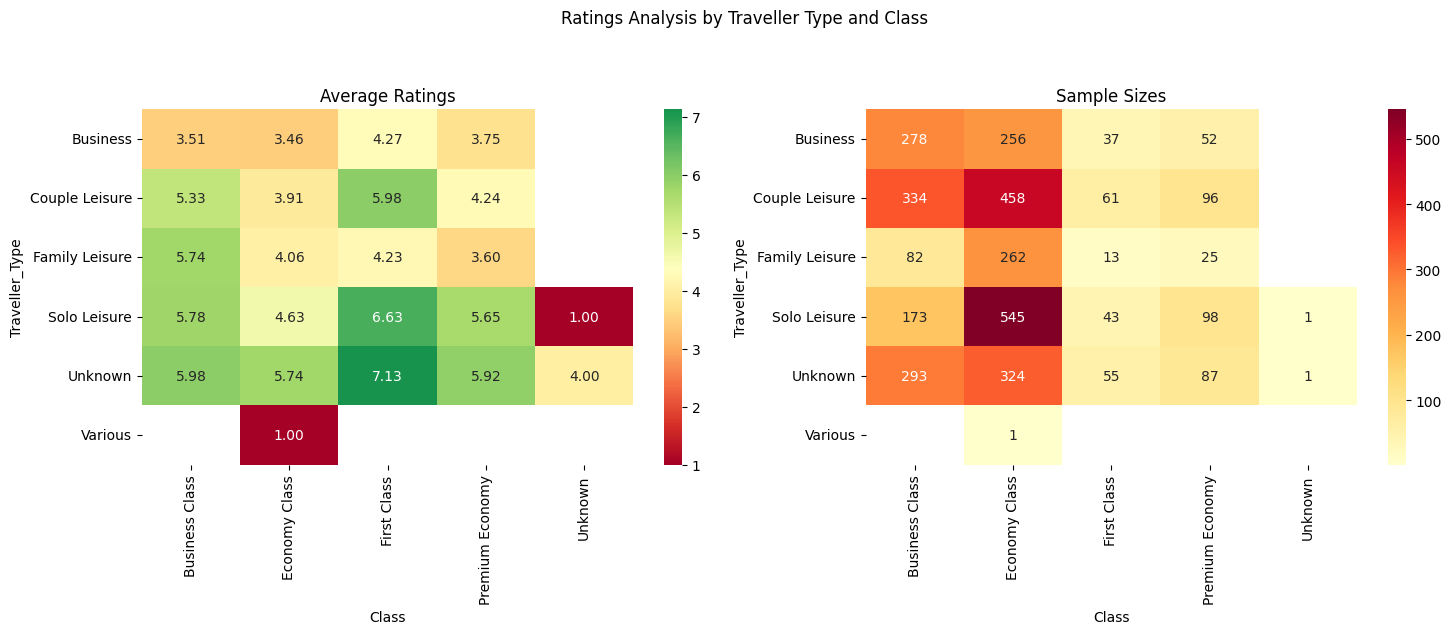


Highest rated combination:
7.127272727272727

Lowest rated combination:
1.0


In [96]:
# Prepare data for heatmap
pivot_ratings = scrapped.pivot_table(
    values='Rating',
    index='Traveller_Type',
    columns='Class',
    aggfunc=['mean', 'count']
)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot mean ratings heatmap
sns.heatmap(pivot_ratings['mean'], 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=pivot_ratings['mean'].mean().mean(),
            ax=ax1)
ax1.set_title('Average Ratings')

# Plot sample sizes heatmap
sns.heatmap(pivot_ratings['count'], 
            annot=True, 
            fmt='g',
            cmap='YlOrRd',
            ax=ax2)
ax2.set_title('Sample Sizes')

plt.suptitle('Ratings Analysis by Traveller Type and Class', y=1.05)
plt.tight_layout()
plt.show()

# Print statistics
print("\nHighest rated combination:")
print(pivot_ratings['mean'].max().max())
print("\nLowest rated combination:")
print(pivot_ratings['mean'].min().min())